In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ames-housing-ml/
import sys
import src.config
train, test = src.config.load_train_test()

Mounted at /content/drive
/content/drive/MyDrive/ames-housing-ml


In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
missing = train.isnull().sum().sort_values(ascending=False)
missing[missing>0]

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


In [5]:
num_features = train.select_dtypes(include=['int64','float64']).columns
cat_features = train.select_dtypes(include=['object']).columns
print("Numerical Features", num_features, "\nCategorical Features", cat_features)

Numerical Features Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object') 
Categorical Features Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinTy

In [6]:
columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                  'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in columns:
    train[col].fillna('None', inplace=True)
    test[col].fillna('None', inplace=True)

/tmp/ipython-input-6-1563751286.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna('None', inplace=True)
/tmp/ipython-input-6-1563751286.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [7]:
columns = ['GarageYrBlt', 'GarageCars', 'GarageArea', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'MasVnrArea']
for col in columns:
    train[col].fillna(0, inplace=True)
    test[col].fillna(0, inplace=True)

train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)
test['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

/tmp/ipython-input-7-3885729525.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(0, inplace=True)
/tmp/ipython-input-7-3885729525.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

In [8]:
columns = ['MasVnrType', 'Electrical']

for col in columns:
    train[col].fillna(train[col].mode()[0], inplace=True)
    test[col].fillna(train[col].mode()[0], inplace=True)

/tmp/ipython-input-8-1123536262.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].mode()[0], inplace=True)
/tmp/ipython-input-8-1123536262.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [9]:
columns = ['Id', 'Utilities']
for col in columns:
  train.drop(col, axis=1, inplace=True)
  test.drop(col, axis=1, inplace=True)

In [10]:
import pandas as pd

train = pd.get_dummies(train)
test = pd.get_dummies(test)

train, test = train.align(test, join='left', axis=1)
test = test.fillna(0)

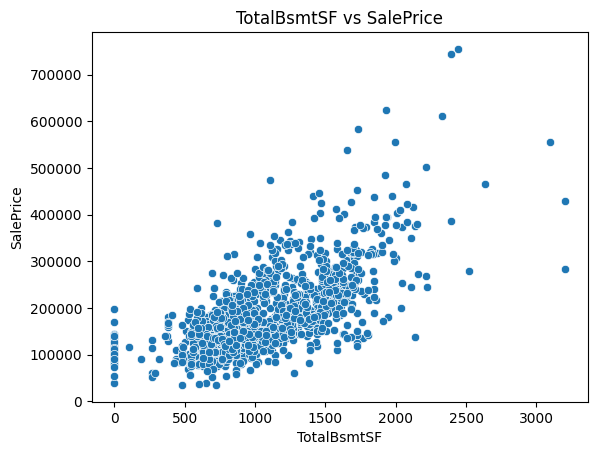

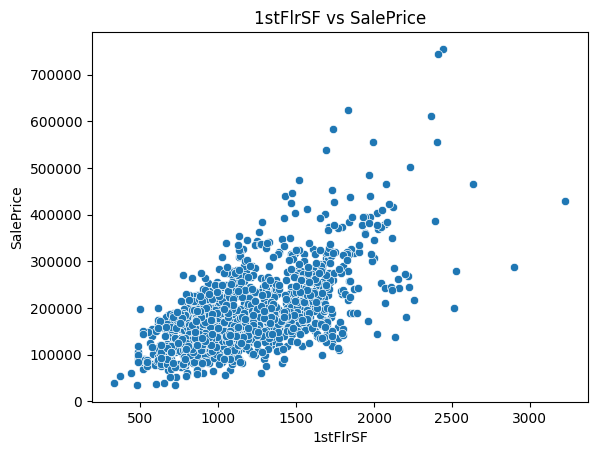

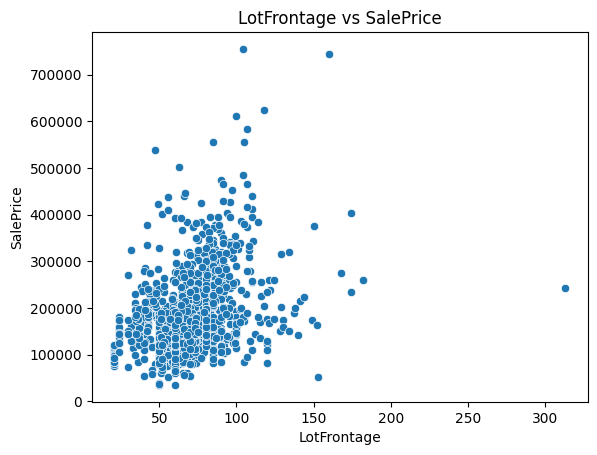

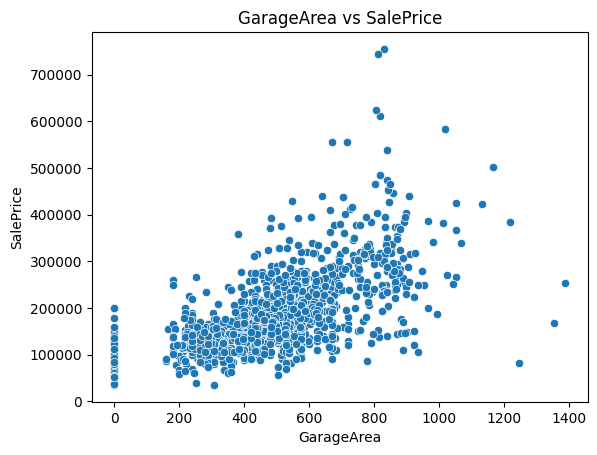

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['TotalBsmtSF', '1stFlrSF', 'LotFrontage', 'GarageArea']
for feature in features:
    sns.scatterplot(x=feature, y='SalePrice', data=train)
    plt.title(f"{feature} vs SalePrice")
    plt.show()

In [22]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

train = remove_outliers(train, 'TotalBsmtSF')
train = remove_outliers(train, '1stFlrSF')
train = remove_outliers(train, 'LotFrontage')
train = remove_outliers(train, 'GarageArea')
test = remove_outliers(train, 'TotalBsmtSF')
test = remove_outliers(train, '1stFlrSF')
test = remove_outliers(train, 'LotFrontage')
test = remove_outliers(train, 'GarageArea')

In [18]:
for col in ['TotalBsmtSF', '1stFlrSF', 'GarageArea', 'LotFrontage']:
    upper_cap = train[col].quantile(0.99)
    train[col] = np.where(train[col] > upper_cap, upper_cap, train[col])

In [23]:
for col in ['TotalBsmtSF', '1stFlrSF', 'GarageArea', 'LotFrontage']:
    upper_cap = test[col].quantile(0.99)
    test[col] = np.where(test[col] > upper_cap, upper_cap, test[col])

<Axes: xlabel='SalePrice', ylabel='Count'>

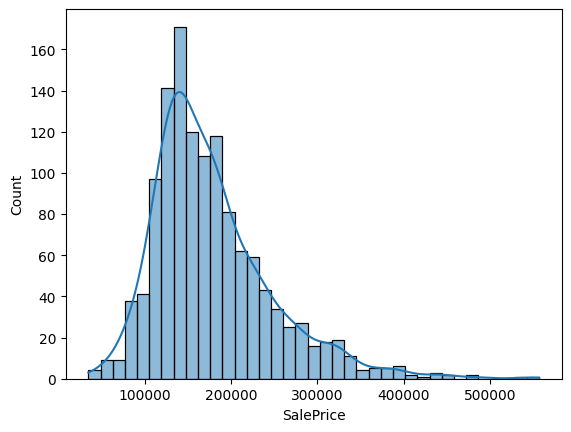

In [19]:
sns.histplot(train['SalePrice'], kde=True)

<Axes: xlabel='SalePrice', ylabel='Count'>

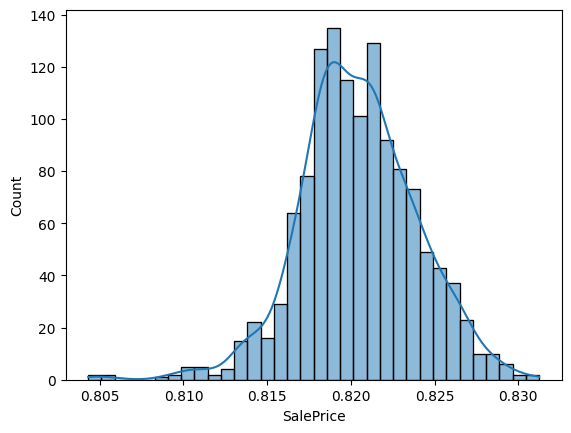

In [26]:
train['SalePrice'] = np.log1p(train['SalePrice'])
sns.histplot(train['SalePrice'], kde=True)

<Axes: xlabel='SalePrice', ylabel='Count'>

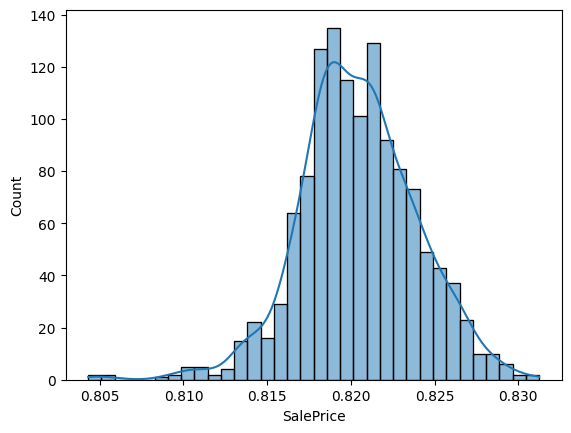

In [25]:
test['SalePrice'] = np.log1p(test['SalePrice'])
sns.histplot(test['SalePrice'], kde=True)

In [27]:
import os

processed_path = '/content/drive/MyDrive/ames-housing-ml/data/processed'
os.makedirs(processed_path, exist_ok=True)

train.to_csv(os.path.join(processed_path, 'train_cleaned.csv'), index=False)
test.to_csv(os.path.join(processed_path, 'test_cleaned.csv'), index=False)